In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pylab
import scipy.stats as st

# DATA READING

In [2]:
df=pd.read_csv("C:\\Users\\Neeraj\\Downloads\\DATASET - RAW DATA.csv")
df

,name,abilities,attack,capture_rate,classfication,defense,height_m,hp,percentage_male,pokedex_number,type1,type2,weight_kg,generation
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",49,45,Seed PokÃ©mon,49,0.7,45,88.1,1,grass,poison,6.9,1
1,Ivysaur,"['Overgrow', 'Chlorophyll']",62,45,Seed PokÃ©mon,63,1.0,60,88.1,2,grass,poison,13.0,1
2,Venusaur,"['Overgrow', 'Chlorophyll']",100,45,Seed PokÃ©mon,123,2.0,80,88.1,3,grass,poison,100.0,1
3,Charmander,"['Blaze', 'Solar Power']",52,45,Lizard PokÃ©mon,43,0.6,39,88.1,4,fire,NaN,8.5,1
4,Charmeleon,"['Blaze', 'Solar Power']",64,45,Flame PokÃ©mon,58,1.1,58,88.1,5,fire,NaN,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Celesteela,['Beast Boost'],101,25,Launch PokÃ©mon,103,9.2,97,NaN,797,steel,flying,999.9,7
797,Kartana,['Beast Boost'],181,255,Drawn Sword PokÃ©mon,131,0.3,59,NaN,798,grass,steel,0.1,7
798,Guzzlord,['Beast Boost'],101,15,Junkivore PokÃ©mon,53,5.5,223,NaN,799,dark,dragon,888.0,7
799,Necrozma,['Prism Armor'],107,3,Prism PokÃ©mon,101,2.4,97,NaN,800,psychic,NaN,230.0,7


In [3]:
df.shape

(801, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             801 non-null    object 
 1   abilities        801 non-null    object 
 2   attack           801 non-null    int64  
 3   capture_rate     801 non-null    object 
 4   classfication    801 non-null    object 
 5   defense          801 non-null    int64  
 6   height_m         781 non-null    float64
 7   hp               801 non-null    int64  
 8   percentage_male  703 non-null    float64
 9   pokedex_number   801 non-null    int64  
 10  type1            801 non-null    object 
 11  type2            417 non-null    object 
 12  weight_kg        781 non-null    float64
 13  generation       801 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 87.7+ KB


In [5]:
df.columns

Index(['name', 'abilities', 'attack', 'capture_rate', 'classfication',
       'defense', 'height_m', 'hp', 'percentage_male', 'pokedex_number',
       'type1', 'type2', 'weight_kg', 'generation'],
      dtype='object')

In [6]:
df.set_index("pokedex_number",inplace=True)

In [7]:
df.isna().sum()

name                 0
abilities            0
attack               0
capture_rate         0
classfication        0
defense              0
height_m            20
hp                   0
percentage_male     98
type1                0
type2              384
weight_kg           20
generation           0
dtype: int64

# DATA CLEANING


In [8]:
df.drop(columns=["type2","percentage_male"],inplace=True)

In [9]:
df["height_m"].fillna(df["height_m"].mean(),inplace=True)

In [10]:
df["weight_kg"].fillna(df["weight_kg"].median(),inplace=True)

In [11]:
df.isna().sum()

name             0
abilities        0
attack           0
capture_rate     0
classfication    0
defense          0
height_m         0
hp               0
type1            0
weight_kg        0
generation       0
dtype: int64

In [12]:
df.duplicated().sum()

0

# DATA VISUALISATION 

In [32]:
df.value_counts("abilities")       #we have 482 number of abilities of 801 pokemons:

abilities
['Levitate']                                       29
['Beast Boost']                                     7
['Shed Skin']                                       5
['Keen Eye', 'Tangled Feet', 'Big Pecks']           4
['Clear Body', 'Light Metal']                       4
                                                   ..
['Lightningrod', 'Solid Rock', 'Reckless']          1
['Levitate', 'Frisk']                               1
['Leaf Guard', 'Queenly Majesty', 'Sweet Veil']     1
['Leaf Guard', 'Chlorophyll']                       1
['Wonder Skin ', 'Magic Guard', 'Tinted Lens']      1
Length: 482, dtype: int64

In [14]:
a=df.sort_values("attack",ascending=False)

In [34]:
a                         # top 5 pokemon which have maximum attack power:

,name,abilities,attack,capture_rate,classfication,defense,height_m,hp,type1,weight_kg,generation
pokedex_number,,,,,,,,,,,
214,Heracross,"['Swarm', 'Guts', 'Moxie']",185,45,Singlehorn PokÃ©mon,115,1.5,80,bug,54.0,2
798,Kartana,['Beast Boost'],181,255,Drawn Sword PokÃ©mon,131,0.3,59,grass,0.1,7
383,Groudon,['Drought'],180,3,Continent PokÃ©mon,160,3.5,100,ground,950.0,3
384,Rayquaza,['Air Lock'],180,45,Sky High PokÃ©mon,100,7.0,105,dragon,206.5,3
445,Garchomp,"['Sand Veil', 'Rough Skin']",170,45,Mach PokÃ©mon,115,1.9,108,dragon,95.0,4
...,...,...,...,...,...,...,...,...,...,...,...
242,Blissey,"['Natural Cure', 'Serene Grace', 'Healer']",10,30,Happiness PokÃ©mon,10,1.5,255,normal,46.8,2
129,Magikarp,"['Swift Swim', 'Rattled']",10,255,Fish PokÃ©mon,55,0.9,20,water,10.0,1
213,Shuckle,"['Sturdy', 'Gluttony', 'Contrary']",10,190,Mold PokÃ©mon,230,0.6,20,bug,20.5,2


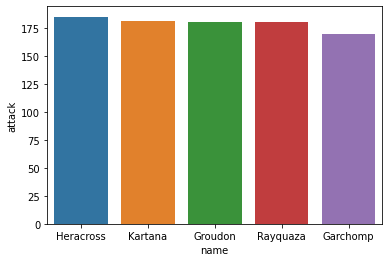

In [16]:
sns.barplot(x="name",y="attack",data=a.head());

In [17]:
a.tail(1)                                  #pokemon which have minimum attack power:

,name,abilities,attack,capture_rate,classfication,defense,height_m,hp,type1,weight_kg,generation
pokedex_number,,,,,,,,,,,
113,Chansey,"['Natural Cure', 'Serene Grace', 'Healer']",5,30,Egg PokÃ©mon,5,1.1,250,normal,34.6,1


In [18]:
df["capture_rate"].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

In [19]:
df[df["capture_rate"]=='255']                #these 69 pokemons are rare because their capture rate is highest

,name,abilities,attack,capture_rate,classfication,defense,height_m,hp,type1,weight_kg,generation
pokedex_number,,,,,,,,,,,
10,Caterpie,"['Shield Dust', 'Run Away']",30,255,Worm PokÃ©mon,35,0.300000,45,bug,2.9,1
13,Weedle,"['Shield Dust', 'Run Away']",35,255,Hairy PokÃ©mon,30,0.300000,40,bug,3.2,1
16,Pidgey,"['Keen Eye', 'Tangled Feet', 'Big Pecks']",45,255,Tiny Bird PokÃ©mon,40,0.300000,40,normal,1.8,1
19,Rattata,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",56,255,Mouse PokÃ©mon,35,1.163892,30,normal,27.3,1
21,Spearow,"['Keen Eye', 'Sniper']",60,255,Tiny Bird PokÃ©mon,30,0.300000,40,normal,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
731,Pikipek,"['Keen Eye', 'Skill Link', 'Pickup']",75,255,Woodpecker PokÃ©mon,30,0.300000,35,normal,1.2,7
734,Yungoos,"['Stakeout', 'Strong Jaw', 'Adaptability']",70,255,Loitering PokÃ©mon,30,0.400000,48,normal,6.0,7
736,Grubbin,['Swarm'],62,255,Larva PokÃ©mon,45,0.400000,47,bug,4.4,7


In [36]:
df[df["capture_rate"]=='255']["type1"].value_counts()

normal     23
bug        12
grass       9
water       7
ground      4
rock        4
poison      2
dark        2
psychic     2
ice         2
fire        1
steel       1
Name: type1, dtype: int64

In [20]:
df["classfication"].value_counts()[:10]          #which class of pokemon are maximum

Dragon PokÃ©mon      8
Mouse PokÃ©mon       6
Mushroom PokÃ©mon    6
Flame PokÃ©mon       5
Balloon PokÃ©mon     5
Fox PokÃ©mon         5
Fairy PokÃ©mon       5
Seed PokÃ©mon        4
Bat PokÃ©mon         4
Drill PokÃ©mon       4
Name: classfication, dtype: int64

In [21]:
b=df.sort_values("defense",ascending=False)

In [33]:
b                                # top 5 pokemon which have maximum defence:

,name,abilities,attack,capture_rate,classfication,defense,height_m,hp,type1,weight_kg,generation
pokedex_number,,,,,,,,,,,
306,Aggron,"['Sturdy', 'Rock Head', 'Heavy Metal']",140,45,Iron Armor PokÃ©mon,230,2.1,70,steel,360.0,3
213,Shuckle,"['Sturdy', 'Gluttony', 'Contrary']",10,190,Mold PokÃ©mon,230,0.6,20,bug,20.5,2
208,Steelix,"['Rock Head', 'Sturdy', 'Sheer Force']",125,25,Iron Snake PokÃ©mon,230,9.2,75,steel,400.0,2
377,Regirock,"['Clear Body', 'Sturdy']",100,3,Rock Peak PokÃ©mon,200,1.7,80,rock,230.0,3
713,Avalugg,"['Own Tempo', 'Ice Body', 'Sturdy']",117,55,Iceberg PokÃ©mon,184,2.0,95,ice,505.0,6
...,...,...,...,...,...,...,...,...,...,...,...
238,Smoochum,"['Oblivious', 'Forewarn', 'Hydration']",30,45,Kiss PokÃ©mon,15,0.4,45,ice,6.0,2
63,Abra,"['Synchronize', 'Inner Focus', 'Magic Guard']",20,200,Psi PokÃ©mon,15,0.9,25,psychic,19.5,1
242,Blissey,"['Natural Cure', 'Serene Grace', 'Healer']",10,30,Happiness PokÃ©mon,10,1.5,255,normal,46.8,2


In [23]:
b.tail(1)                                 #minimum defence pokemon

,name,abilities,attack,capture_rate,classfication,defense,height_m,hp,type1,weight_kg,generation
pokedex_number,,,,,,,,,,,
113,Chansey,"['Natural Cure', 'Serene Grace', 'Healer']",5,30,Egg PokÃ©mon,5,1.1,250,normal,34.6,1


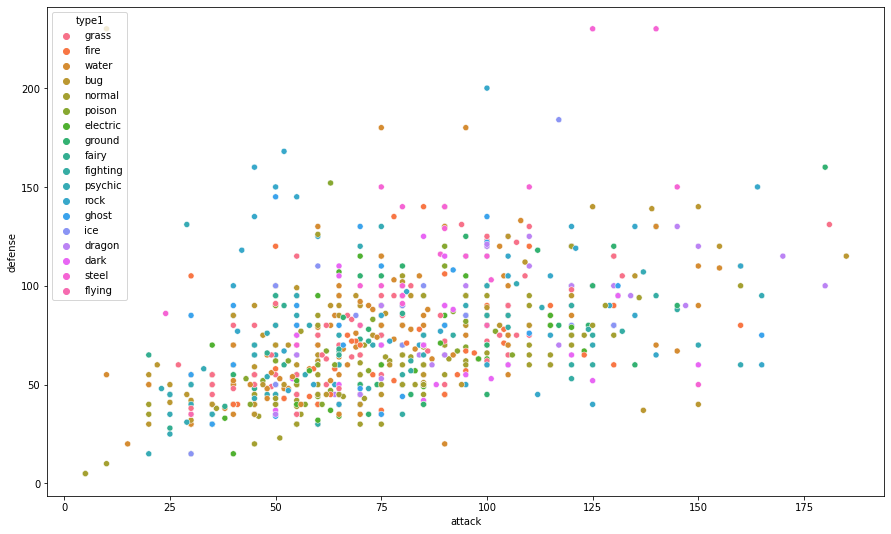

In [24]:
plt.figure(figsize=(15,9))
import warnings
warnings.filterwarnings("ignore")
sns.scatterplot(df["attack"],df["defense"],hue="type1",data=df);   

In [25]:
df["type1"].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [26]:
df["type1"].value_counts()       #which type of pokemon we have the most:

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

In [39]:
df.sort_values("weight_kg")

,name,abilities,attack,capture_rate,classfication,defense,height_m,hp,type1,weight_kg,generation
pokedex_number,,,,,,,,,,,
92,Gastly,['Levitate'],35,190,Gas PokÃ©mon,30,1.3,30,ghost,0.1,1
798,Kartana,['Beast Boost'],181,255,Drawn Sword PokÃ©mon,131,0.3,59,grass,0.1,7
789,Cosmog,['Unaware'],29,45,Nebula PokÃ©mon,31,0.2,43,psychic,0.1,7
93,Haunter,['Levitate'],50,90,Gas PokÃ©mon,45,1.6,45,ghost,0.1,1
669,FlabÃ©bÃ©,"['Flower Veil', 'Symbiosis']",38,225,Single Bloom PokÃ©mon,39,0.1,44,fairy,0.1,6
...,...,...,...,...,...,...,...,...,...,...,...
799,Guzzlord,['Beast Boost'],101,15,Junkivore PokÃ©mon,53,5.5,223,dark,888.0,7
750,Mudsdale,"['Own Tempo', 'Stamina', 'Inner Focus']",125,60,Draft Horse PokÃ©mon,100,2.5,100,ground,920.0,7
383,Groudon,['Drought'],180,3,Continent PokÃ©mon,160,3.5,100,ground,950.0,3


<AxesSubplot:xlabel='type1', ylabel='count'>

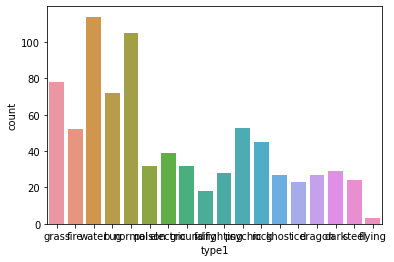

In [31]:
sns.countplot(df["type1"])

In [38]:
df[df["type1"]=="flying"]

,name,abilities,attack,capture_rate,classfication,defense,height_m,hp,type1,weight_kg,generation
pokedex_number,,,,,,,,,,,
641,Tornadus,"['Prankster', 'Defiant', 'Regenerator']",100,3,Cyclone PokÃ©mon,80,1.5,79,flying,63.0,5
714,Noibat,"['Frisk', 'Infiltrator', 'Telepathy']",30,190,Sound Wave PokÃ©mon,35,0.5,40,flying,8.0,6
715,Noivern,"['Frisk', 'Infiltrator', 'Telepathy']",70,45,Sound Wave PokÃ©mon,80,1.5,85,flying,85.0,6


<AxesSubplot:>

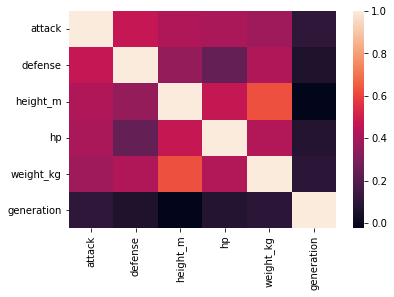

In [40]:
sns.heatmap(df.corr())